> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

The dataset for No-show appointments project collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each column. For example, we include characteristics information like 'PatientID', 'AppointmentID', 'Gender', 'ScheduledDay', 'Age','Neighhbourhood', 'Scholarship' etc. Some interesting features like ‘ScheduledDay’ can tell us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. It is very important to note the last column 'No-show'. It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. From this table, I plan to explore the question: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head() # Take a quick look at data 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info() # To check if there are any missing values 
sum(df.duplicated()) # To check if there are any duplicated rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning
### Replace wrong data type

In [7]:

# From info function, we can see that the type of Patient ID is incorrect.
#It should not be float, and we should replaced it to integer
# Also we want to remove the unnecessary time information in SchduledDay and AppointmentDay
df['PatientId']=df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Rename wrong column name

In [8]:
df.rename(columns={'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID', 'No-show':'No_show', 'Hipertension': 'Hypertension',
                'Handcap': 'Handicap'},inplace = True)
df.head()

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Change Yes or No in No_show Column to 1 or 0. Thus it is easier for vistualization 

In [9]:
# we need to change Yes and No information of No_show column to integer 1 or 0. This is useful for future data analysis
df.info()
df["No_show"] = np.where((df.No_show=="Yes"), 1, 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID        110527 non-null int64
Appointment_ID    110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID        110527 non-null int64
Appointment_ID    110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Determine the fraction of No_show and Shows of total dataset
### The first step is to determine how many patients don't show up for appointment in the dataset. This value is very important since it indicates how bad is ths situation of no_show problem.

0.20193255946510807 0.798067440534892


Text(0.5,1,'No_show Vs Show Appointment ')

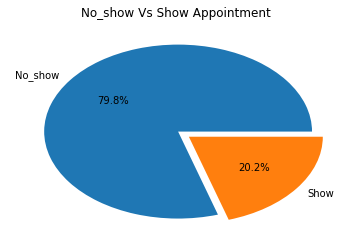

In [11]:

# Determine the fraction of No-Show and Shows in total data
N1 = sum(df.No_show == 1)/(sum(df.No_show == 1)+sum(df.No_show == 0))
N0 = sum(df.No_show == 0)/(sum(df.No_show == 1)+sum(df.No_show == 0))
print(N1,N0)
labels = 'No_show', 'Show'
sizes = [N0, N1]
explode = (0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('No_show Vs Show Appointment ')

### From the pie chart, one can directly observe that about 80% patient don't show up for appointment. Thus this is a serious problem and we need to determine the main reason behind this situation

### Define a function for plotting data
### This is a Python function I wrote to plot data in bar chart. Since we will analysis multiple varibles in the dataset. Writing a python function can help me to not write repetitive code for same purpose

In [53]:
def plot_bar (x1,x2,label1,label2,title,ylable):
    locations = [1, 2]
    heights = [x1, x2]
    labels = [label1, label2]

    bar1 = plt.bar(locations, heights, tick_label=labels, color=['red','lightblue'])
    plt.title(title)
    plt.ylabel(ylable);
    

### I want to create two separate tables for 'show' and 'No_show' results and analysis each variable in separate tables. This is useful to summarize the total number of each factor in 'no_show' or 'show' cases

In [54]:
#Create a table with just No_show information 
No_shows = df.query('No_show == "1"')
No_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 14 columns):
Patient_ID        22319 non-null int64
Appointment_ID    22319 non-null int64
Gender            22319 non-null object
ScheduledDay      22319 non-null object
AppointmentDay    22319 non-null object
Age               22319 non-null int64
Neighbourhood     22319 non-null object
Scholarship       22319 non-null int64
Hypertension      22319 non-null int64
Diabetes          22319 non-null int64
Alcoholism        22319 non-null int64
Handicap          22319 non-null int64
SMS_received      22319 non-null int64
No_show           22319 non-null int64
dtypes: int64(10), object(4)
memory usage: 2.6+ MB


In [55]:
# Create a table with 'Show' information
Shows = df.query('No_show == ''0''')
Shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID        88208 non-null int64
Appointment_ID    88208 non-null int64
Gender            88208 non-null object
ScheduledDay      88208 non-null object
AppointmentDay    88208 non-null object
Age               88208 non-null int64
Neighbourhood     88208 non-null object
Scholarship       88208 non-null int64
Hypertension      88208 non-null int64
Diabetes          88208 non-null int64
Alcoholism        88208 non-null int64
Handicap          88208 non-null int64
SMS_received      88208 non-null int64
No_show           88208 non-null int64
dtypes: int64(10), object(4)
memory usage: 10.1+ MB


In [56]:
No_shows.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0


#### At 'Shows' and 'No_shows' table, determine the characteristic probablities like ages, scholarship, and extra, 

### 1. Determine the average age for both 'Show' and 'No_show' cases

In [57]:
Shows_age_mean = Shows.Age.mean()

In [58]:
No_shows_age_mean = No_shows.Age.mean()

In [59]:
Ages = {'': ['No_shows','Shows'],
        'Average Mean': [No_shows_age_mean,Shows_age_mean]
        }

Age_Table = pd.DataFrame(Ages, columns = ['', 'Average Mean'])

print (Age_Table)


             Average Mean
0  No_shows     34.317667
1     Shows     37.790064


### I use a table to compare two values for age mean in no_show and show situation. And From this result, we can see there is no big difference between average age and age is not an important factor for determining if a patient show up for appointment or not

### 2. Determine the relationship between Scholarship and No-show variables

### This factor maybe very important. We expect that if a patient has a scholarship, he should show up for patient since his fee maybe covered. However, if a patient does not have a scholarship, he maybe poor and has financial issue, thus he has a higher chance of missing appointment

In [60]:
#Calculate the probability of a patient shows up for appointment if he has a scholarship, 
S1 = sum(Shows.Scholarship == 1)/(sum(No_shows.Scholarship == 1)+sum(Shows.Scholarship == 1))

In [61]:
#Calculate the probability of a patient shows up for appointment if he does not have a scholarship, 
S2 = sum(Shows.Scholarship == 0)/(sum(No_shows.Scholarship == 0)+sum(Shows.Scholarship == 0))
print(S1,S2)

0.7626369579228433 0.8019284409929164


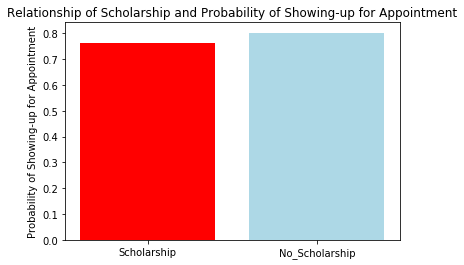

In [62]:
plot_bar (S1,S2,'Scholarship','No_Scholarship','Relationship of Scholarship and Probability of Showing-up for Appointment','Probability of Showing-up for Appointment')

### However, this bar chart directly shows that scholarship does not influence the probability of show_up for appointment. Two probability are very close. 

### 3. Determine the Relationship between Neightborhood and No-show variables

In [63]:
# Count the number of no_shows for different location and we can determine which location has highest no_show value
Neighbor_Table = No_shows['Neighbourhood'].value_counts()
Neighbor_Table.head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: Neighbourhood, dtype: int64

### This variable is very informative. If hospital is very far from some locations or if this location has very bad transportation, patient has higher chance of missing appointment. I used a table to indicate top 10 location with highest no_show rate. Location is an important factor for deciding if a patient show up for appointment or not

### 4. Determine the effect of medical history on the No-Show variables

In [64]:
#Calculate the probability of a patient not shows up for appointment if he has a Hypertension, Diabetes, Alcoholism, Handicap
Total_sick_Noshows = sum(No_shows.Hypertension == 1)+sum(No_shows.Diabetes == 1)+sum(No_shows.Alcoholism == 1)+sum(No_shows.Handicap == 1)
H1 = sum(No_shows.Hypertension == 1)/Total_sick_Noshows
D1 = sum(No_shows.Diabetes == 1)/Total_sick_Noshows
A1 = sum(No_shows.Alcoholism == 1)/Total_sick_Noshows
Han1 = sum(No_shows.Handicap == 1)/Total_sick_Noshows
Total_sick_Noshows_ratio = Total_sick_Noshows/df.No_show.count()
print(H1,D1,A1,Han1,Total_sick_Noshows_ratio)

0.6040032025620496 0.22898318654923938 0.10840672538030424 0.058606885508406724 0.0565020311779


Text(0.5,1,'Effect of Health on No-shows Appointment')

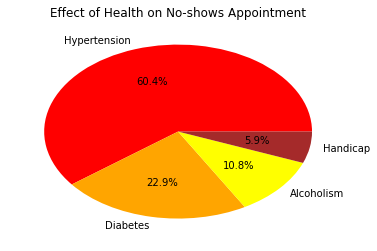

In [65]:
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', ]
sizes = [H1,D1,A1,Han1]
plt.pie(sizes, labels=labels, colors = ['Red', 'Orange', 'Yellow', 'Brown'],autopct='%1.1f%%')
plt.title('Effect of Health on No-shows Appointment')

### I summarized four medical factor together and determine which one has highest impact on no_show rate. From this pie chart, one can directly see that Hypertension has biggest influence. However, it is also important to note that the fraction of people with healthy issue in no_show case is only 5%. Thus, even though a patient may have some healthy issue, he only has 5% chance missing appointment which is reasonable since patient with medical issue would prefer to visit doctors faster and on time

## Determine the relationship between SMS_received and No_show data

In [66]:
#Calculate the probability of a patient shows up for appointment if he has received a SMS massage 
SMS1 = sum(Shows.SMS_received == 1)/(sum(No_shows.SMS_received == 1)+sum(Shows.SMS_received == 1))
SMS0 = sum(Shows.SMS_received == 0)/(sum(No_shows.SMS_received == 0)+sum(Shows.SMS_received == 0))
print(SMS1,SMS0)


0.7242545516036301 0.8329668865347458


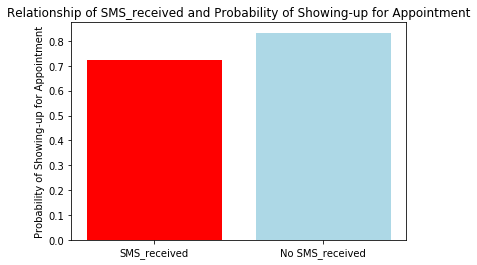

In [67]:
plot_bar (SMS1,SMS0,'SMS_received', 'No SMS_received','Relationship of SMS_received and Probability of Showing-up for Appointment','Probability of Showing-up for Appointment')


### I want to analysis the effectiveness of sending message to patient on showing_up rate. Intuitively, if a patient receive a SMS message, the potential that he forget about appointment is very small. Thus we eliminate the potential case that he miss the appointment becasue he forget about it. However, from this pie chart, one can see that SMS message cannot greatly affect showing_up rate. This is not an important factor

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

 Totally 79.8% patient don't show up for appointments. I divided the original table into two separate tables for 'shows' and 'no_shows' situation and draw conclusions as described below
 
 • The age effect on the no_show appointment variable:

The mean age for No_show appointment is 34 and for Show appointment is 37. Thus there is no significant difference between these two average age values. This indicate that the age of patient is not a highly influencing factor for showing up appointment or not.

• The Scholarship effect on the no_show appointment variable:

I calculated the probability of a patient showing up for appointment if he has a scholarship which is 0.76 and the probability of a patient showing up for appointment if he does not have a scholarship which is 0.80. This indicates that scholarship cannot greatly effect if a patient shows up for appointment or not. I shows this analysis in a bar chart which clearly shows similar height

• The Neighborhood effect on the no_show appointment variable:

I count the number of no_shows for different location and listed top 10 locations with highest no_show value in a table. I can directly see that JARDIM CAMBURI has highest no_show value. This may caused by long distance between this location to hospital or bad transportation. The neighborhood is a siginificant varible for no_show appointment variable

• The effect of patients' health on the no_show appointment variable:

I alculate the probability of a patient having a Hypertension, or Diabetes, or Alcoholism or Handicap if he is sick and not shows up for appointment. It seems like Hypertension has highest portion among these healthy issues (about 60%). However, we can see that the portion of healthy issue in total number of no_show people is not significant (5%). Thus healthy issue is not a big factor for influencing no_show decision

• The effect of SMS_received on the no_show appointment variable:

I calculate the probability of a patient shows up for appointment if he has received a SMS massage and plot the data in a bar chart. We can see that if a patient doesn't receive SMS message, he has higher chance to show up for appointment. The probability increase from 72% to 83% which is a very interesting and unexpected finding.

## Limitations

However, this dataset still have some limitations for the analysis of data. For example, we don't know the characteristics like weather, season, or traffic to study the case. It would be better to include these information for future study

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0